# One-class SVM - novelty detection

`One-class SVM <svm_outlier_detection>`은 
novelty detection을 위한 결정 기능을 학습하는 비지도 학습 알고리즘:
새로운 데이터를 훈련 세트와 유사하거나 다른 것으로 분류합니다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm

-5 와 5 사이에 500개의 값 생성  
x, y 축으로 grid 생성 

In [37]:
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
xx.shape, yy.shape

((500, 500), (500, 500))

훈련 데이터 생성, 규칙적인 새로운 관측치 생성, 비정상적인 새로운 관측치 생성

In [39]:
# 훈련 데이터 생성
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]

# 규칙적인 새로운 관측치 생성
X = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X + 2, X - 2]

# 비정상적인 새로운 관측치 생성
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

X_train.shape, X_test.shape, X_outliers.shape

((200, 2), (40, 2), (20, 2))

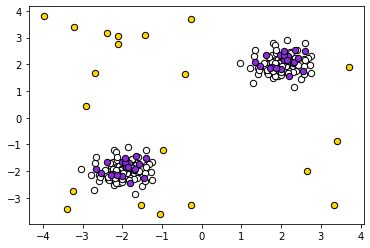

In [40]:
s = 40
plt.scatter(X_train[:, 0], X_train[:, 1], c="white", s=s, edgecolors="k")
plt.scatter(X_test[:, 0], X_test[:, 1], c="blueviolet", s=s, edgecolors="k")
plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c="gold", s=s, edgecolors="k")

### 모델 훈련 - SVM  
- kernel function    
- SVM은 초평면(hyper-plane)이라는 개념을 사용하여 데이터를 분류  
- kernel function을 이용한 차원 변경 trick 사용  

nu : 훈련 오류 비율의 상한값과 support vector 비율의 하한값입니다.  기본적으로 0.5가 사용

In [61]:
# fit the model
clf = svm.OneClassSVM(nu=0.1, kernel="rbf")
clf.fit(X_train)

y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

In [62]:
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

print(n_error_train)
print(n_error_test)
print(n_error_outliers)

22
1
0


선, 점 및 평면에 가장 가까운 벡터를 플로팅합니다.

In [48]:
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
Z.shape

(500, 500)

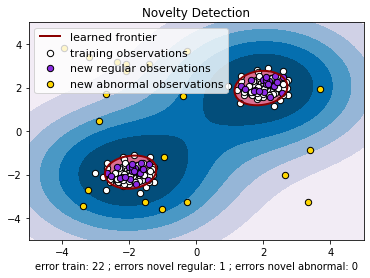

In [58]:
plt.title("Novelty Detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors="darkred")
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors="palevioletred")
s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c="white", s=s, edgecolors="k")
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c="blueviolet", s=s, edgecolors="k")
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c="gold", s=s, edgecolors="k")
plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend(
    [a.collections[0], b1, b2, c],
    [
        "learned frontier",
        "training observations",
        "new regular observations",
        "new abnormal observations",
    ],
    loc="upper left",
    prop=matplotlib.font_manager.FontProperties(size=11),
)
plt.xlabel(
    f"error train: {n_error_train} ; errors novel regular: {n_error_test} ; errors novel abnormal: {n_error_outliers}")
plt.show()